# Voting Data Analysis

In [151]:
# Load dplyr as access to 'count' function resident in that R package
library(dplyr)

# Set default digit precision to 5
options(digits=5)

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).

In [152]:
# Setting a random seed, as it is good practice...
set.seed(3169)

# Reading in the data from the csv database as object data
data = read.csv("anes_pilot_2018.csv", stringsAsFactors = FALSE)

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


Precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Objective

Use the ANES dataset to address five research questions below. 

1. Do US voters have more respect for the police or for journalists?
2. Are Republican voters older or younger than Democratic voters?
3. Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?
4. Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?
5. Are Americans who are empathetic towards racial and ethnic groups more likely to care about climate change?

# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

Variables $ftpolice$ and $ftjournal$ are proposed to be operationalized as being measures of respect for the two groups. 

The actual Survey Questions:

$ftpolice$: ftpolice_therm -- How would you rate the police?

$fjournal$: ftjournal_therm -- How would you rate journalists?

The questions are measured on a Likert scale from 0 to 100 from "Very cold or unfavorable feeling" to "Very warm or favorable feeling".

"Very cold or unfavorable feeling" -> "Quite cold or unfavorable feeling" -> "Fairly cold or unfavorable feeling" -> "A bit more cold or unfavorable than warm" -> "No feeling at all" -> "A bit more warm or favorable feeling than cold" -> "Fairly warm or favorable feeling" -> "Quite warm or favorable feeling" -> "Very warm or favorable feeling"

It is envisaged to operationalize 'ratings' for the police and journalists as the measure of respect for such. These are the best variables as they can be used to measure overall feelings of US voters towards both journalists and police.

It will be inferred from the respondents answers to the two questions that whichever of the two groups indentified have the higher ratings will be proposed to be the more respected grouping, as per the main question.

An initial approach to gauging the respect held for each group is found by estimating the mean of each variable and comparing them.

One potential gap or flaw within the operationalized variables is the fact that the word 'rating' is interpreted subjectively and it should be understood that each person will have a nuanced view of what that means to them. 'Rating' is a rather holistic term and can be interpreted to mean how well someone is doing their job/work, how much they are trusted even or indeed as proposed here, the respect and esteem in which they are held.

### EDA

[1] "Number of Observations:  2500"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    47.0    70.0    64.7    90.0   100.0 

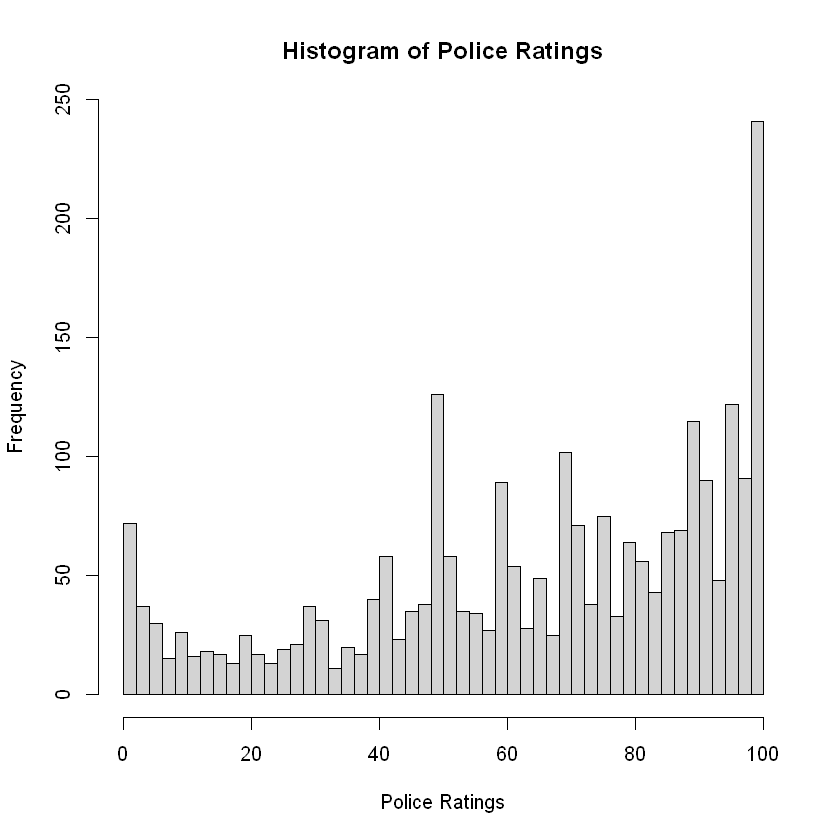

In [153]:
# Loading data into appropriate objects
ftpolice = data$ftpolice
ftjournal = data$ftjournal

# Police rating EDA
paste('Number of Observations: ', length(ftpolice))
summary(ftpolice)
hist(ftpolice,breaks=50, main= "Histogram of Police Ratings",xlab="Police Ratings")

The survey has 2,500 individual user respondents in total.  The accepted responses to the $ftpolice$ question range from 0 to 100, and the mean, 64.68, is less than the median, 70, which indicates a degree of negative skewness in the distribution of $ftpolice$. There are no missing, unusual or 'spoiled' observations.

The histogram above shows us the distibution of $ftpolice$ is not normal. According to the Central Limit Theorem, based purely on sample size, this data group should be large enough to assume a sample normal distribution.

[1] "Number of Observations:  2500"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -7.0    21.0    52.0    52.3    82.0   100.0 

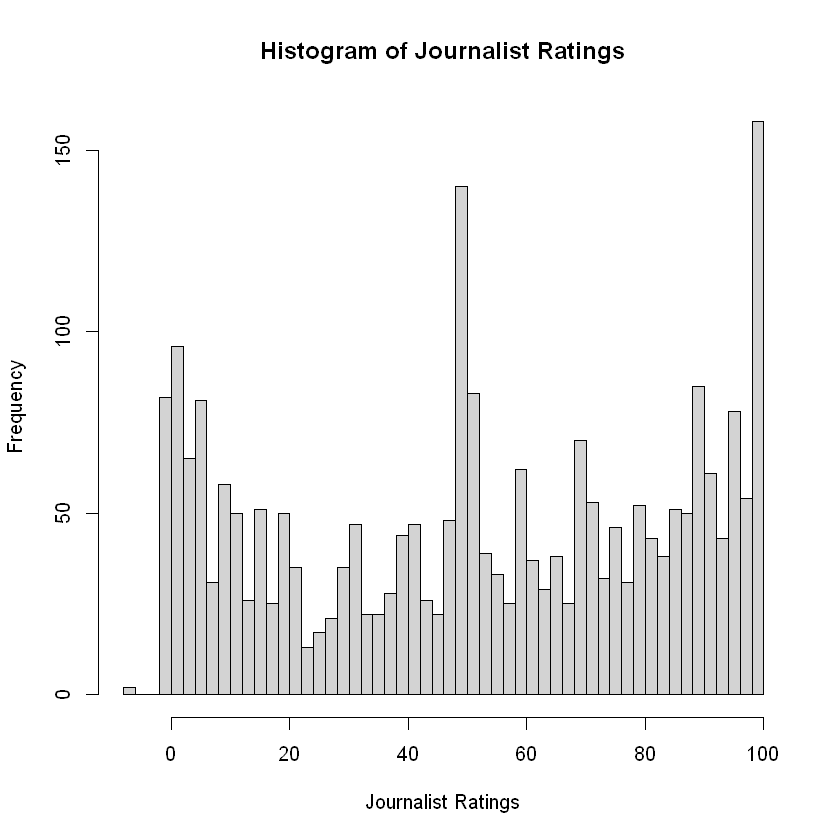

In [154]:
# Journalist rating EDA
paste('Number of Observations: ', length(ftjournal))
summary(ftjournal)
hist(ftjournal,breaks=50, main= "Histogram of Journalist Ratings",xlab="Journalist Ratings")

# exclude the -7 in journalist and same surveyers from police

The $ftjournal$ variable responses range from -7 to 100. The mean, 52.26, is greater than the median, 52. This indicates a minor degree of positive skewness in the distribution of $ftjournal$. The acceptable range of this variable is 0 to 100 as that is the range proposed for the survey question. Although from "ANES User's Guide and Codebook" provided it seems as though the enumeration -7 is substituted as a value when respondents did not answer this question. Though the documentation does not explicitly specify whether this was to be the approach taken for the $ftjournal$ variable in the instance where the respondent did not answer the question. In the accepted approach it was decided to remove the -7 values from $ftjournal$ and remove those respondents completely from the following estimates based upon both variables under consideration. The -7 values, not listed on the Likert scale from 0-100, can be outliers that produce bias results and lead to incorrect conclusions, when in fact they are really aberrant data.

The histogram above shows us the distibution of $ftjournal$ is not normal.  According to the Central Limit Theorem, based purely on sample size, this data group should be large enough to assume a sample normal distribution.

[1] "Number of Observations Police ratings:  2498"

[1] "Number of Observations Journalist ratings:  2498"

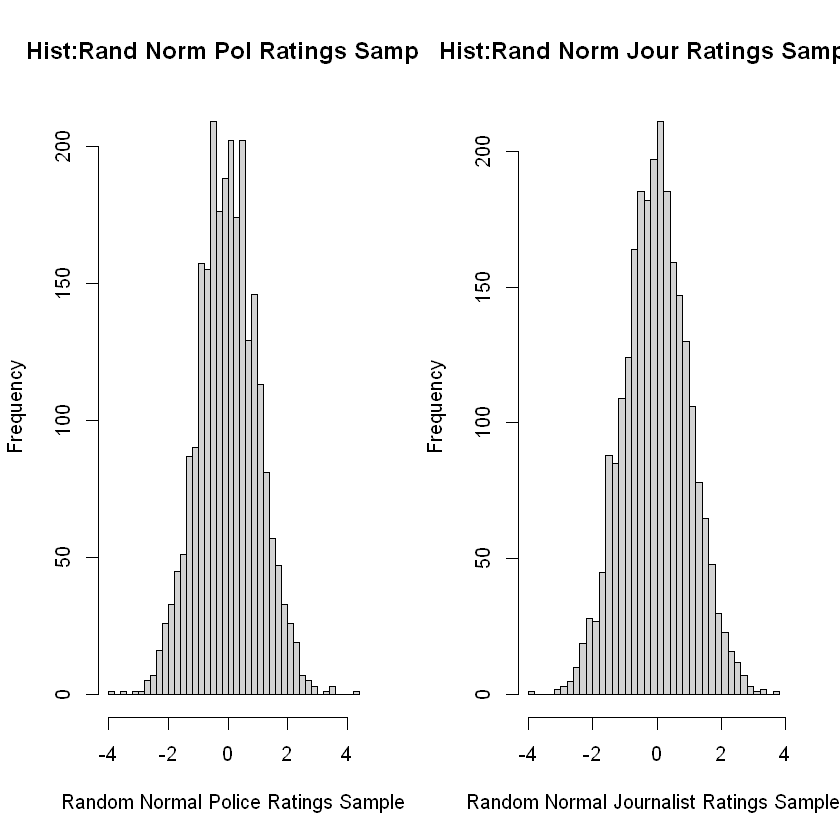

In [155]:
# Removing -7 values
newpoliceval = ftpolice[ftjournal != -7]
newjournalval = ftjournal[ftjournal != -7]
paste('Number of Observations Police ratings: ', length(newpoliceval))
paste('Number of Observations Journalist ratings: ', length(newjournalval))
par(mfrow=c(1,2))

# Police Ratings Sampling
par(mfrow=c(1,2))
policeSample=sample(newpoliceval)
hist(rnorm(policeSample), breaks = 50, main="Hist:Rand Norm Pol Ratings Sample", xlab="Random Normal Police Ratings Sample")

# Journalist Ratings Sampling
journalSample=sample(newjournalval)
hist(rnorm(journalSample), breaks = 50, main="Hist:Rand Norm Jour Ratings Sample", xlab="Random Normal Journalist Ratings Sample")

The sample distribution from both police ratings and journalists ratings are approximately normally distributed as shown above. We have also removed the subjects that produced -7 values in the journalist question.

### Hypothesis test

A t-test is suggested as more appropriate for use as we do not know the population standard deviation.

$H_0$: There are no differences in mean between police and journalist ratings. Difference in their mean = 0.

$H_a$: There is a difference in mean betwen police and journalist ratings. Difference in their mean != 0. 

There is an anticipation of a difference in the means however the direction of which has not been established.
Therefore a two-tailed Paired t-test on the sample mean difference between Police and Journalists will be undertaken. 

Assumptions:
- There is a natural pairing between our observations. Two observations, police ratings and journalist ratings are from the same survey respondent. Each respondent replies to both questions so they correspond to one police rating value and one journalist rating value.

- Observations are proposed to be independent of one another. We are further proposing that each respondent has decided their own personal rating of police and journalists and this has not been otherwise influenced.

- The study variables are measured on a rising scale; in this instance an ordinal Likert scale from "Very cold or unfavorable feeling" changing to "Very warm or favorable feeling". Since the scale has more than 5 points we are likely to get a closely accurate p-value.

- The study variables should be approximately normally distributed. This is demonstrated in the histograms "Sample Diff. of Police and Journalist Ratings" detailed following. It is therein confirmed that the sample difference is approximately normally distributed.

- The study variables should not contain any outliers. As visualized in in the histogram "Diff. of Police and Journalist Ratings" following, we can confirm that there are no outliers or rare values that appear far away from the centrally distributed data.

- A presumption of normality to the data is adopted.

- According to Central Limit Theorem, the size of the data (2498) is large enough to assume a sample normal distribution.

Looking at the means below, we notice there is ~12 point difference in the means which appears to statistically significant, although tests will confirm statistical significance.

[1] "Mean Police ratings 64.6665332265813"

[1] "Mean Journalist ratings 52.3118494795837"

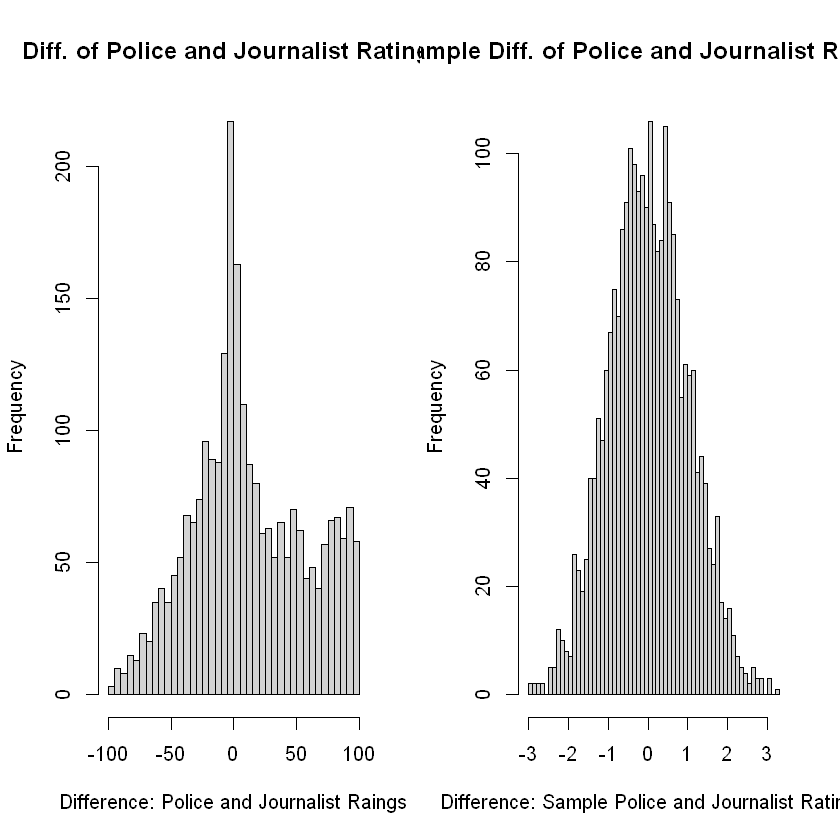

In [156]:
# Produce a histogram of the difference between the ftpolice and ftjournal
paste ("Mean Police ratings",c(mean(newpoliceval)))
paste ("Mean Journalist ratings",mean(newjournalval))
par(mfrow=c(1,2))
hist(ftpolice-ftjournal, breaks = 50,main = "Diff. of Police and Journalist Ratings", xlab="Difference: Police and Journalist Raings")

# Produce a histogram of the difference between samples of ftpolice and ftjournal
differenceRatings = sample(ftpolice)-sample(ftjournal)
hist(rnorm(differenceRatings), breaks=50, main = "Sample Diff. of Police and Journalist Ratings", xlab="Difference: Sample Police and Journalist Ratings")

Undertaking a t-test and recording the t-statistic and the degree of freedom (df), for use in the effect size calculation.

In [157]:
t_stat_val <- t.test(newpoliceval,newjournalval,paired=T)$statistic
df_val <- t.test(newpoliceval,newjournalval,paired=T)$parameter
t.test(newpoliceval,newjournalval,paired=T)


	Paired t-test

data:  newpoliceval and newjournalval
t = 13.7, df = 2497, p-value <2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.588 14.122
sample estimates:
mean of the differences 
                 12.355 


Calculating Pratical Significance: "Effect Size Correlation (r)" 
$r=\frac{t}{\sqrt{t^2+df}}$

In [158]:
r=t_stat_val/sqrt((t_stat_val^2)+df_val)
paste("Effect Size Correlation (r) = ", round(r, digits = 3))

[1] "Effect Size Correlation (r) =  0.265"

Our paired t-test results demonstrates that the p-value (<2e-16) is less than 0.05, which means this test is highly statistically significant. 

Assuming our $H_0$ is true, it shows less than 5% chance of obtaining results like the ones that were observed. Therefore, we can reject our $H_0$ and support our $H_a$, difference in the means $!=0$ . 

Due to "Effect Size Correlation (r)" (0.265) > 0.1 and close to 0.3 we can conclude that our test shows less than medium practical significance.

Our sample mean of difference between police and journalists is positive. We can suggest that Police are more respected than journalists as the mean (12.355) was calculated difference between sample mean of police ratings to sample of mean journalist ratings. In conlcusion while police do seem to be respected more from our statiscally significant t-test, it is not pratically significant.

## Question 2: Are Republican voters older or younger than Democratic voters?

It is proposed to operationalize variables $birthyr$ and $pid7x$ to answer the "Are Republican voters older or younger than Democratic voters?" question.

Survey Questions:

$birthyr$: "“In what year were you born?”

$pid7x$: "Party ID Summary"
-7 "no answer" - 1 "Strong Dem" -  2 "Not very strong Dem" - 3 "Ind, closer to Dem" -4 "Independent" - 5 "Ind, closer to Rep" - 6 "Not very strong Rep" - 7 "Strong Rep".

$birthyr$ is the year of the subjects birth and can be operationalized as a mesure of age of subjects. $pid7x$ is a Likert scale from 1-7 from "Strong Dem" to "Strong Rep" respectively and is proposed to be operationalized as a strong measure of party affiliation. We can create subsets of subjects based on the party affiliation and compare the ages.

The gaps within the variables we have are the fact that the party id summary does not explictly label subjects as Republican or Democrat. This means we have to  aggregate some of the scale options to assess affiliation as either Republican or Democrat. For the purposes of this question 1 "Strong Dem", 2 "Not very strong Dem", and 3 "Ind, closer to Dem" will be considered Democrats while, 5 "Ind, closer to Rep", 6 "Not very strong Rep", and 7 "Strong Rep" will be considered Republicans.  Those who specfied 4 'Independent' are removed from the following analysis. The thought behind this is subjects that have a strong, not very strong, and a "closer" party id are likely to vote for a specific party. While those that claim absolute independence are accepted as declaring that they have no party affiliations. 

There can be instances where and "Indepdendent, closer to x" votes for party y. Though we are accepting that risk because of the fact that the subject has had opportunity to state their indpendence resolutely, but chose not to.

### EDA

Taking a summary of $birthyr$ and $pid7x$ shows us an intial understanding of our ranges. $birthyr$ might be easier to work with if it contained an age rather than year of birth. $pid7x$ has a single (-7) value which is identified in the ANES document provisos as "non-answer". We would also want to remove the Independents (answer 4) from this scenario as it represents respondents that are identified as not leaning toward or affiliated with any party.

In [159]:
# Subsetdata
subsetdata = data[,c("birthyr","pid7x")]
# Look at the summary of the subset
summary(subsetdata)

# Remove "no answer" and "Independent"
birthYr = subsetdata$birthyr[subsetdata$pid7x != -7 & subsetdata$pid7x != 4 ]
partyAllign = subsetdata$pid7x[subsetdata$pid7x != -7 & subsetdata$pid7x != 4 ]

    birthyr         pid7x      
 Min.   :1927   Min.   :-7.00  
 1st Qu.:1956   1st Qu.: 1.00  
 Median :1966   Median : 4.00  
 Mean   :1969   Mean   : 3.29  
 3rd Qu.:1983   3rd Qu.: 5.00  
 Max.   :2000   Max.   : 7.00  

Next it is intended to label each observation as either "Republican" or "Democrat". From the remaing values in $pid7x$ changed to $partyAllign$ we have 1,2,3 (dem) and 5,6,7 (rep) labeled as $polAffil$.

$birthYr$ will also be changed to distinguish age more easily. 

In [160]:
# Calculate the polAffil variable
polAffil = factor(ifelse(partyAllign < 4,"Republican","Democrat"))

# Calculate age
subjectage = 2020-birthYr

paste("Number of observations for partyAllign:",length(polAffil))
paste("Number of observations for birthYr:",length(subjectage))

# Summary polaffil and subject age
summary(polAffil)

# Variable designation based on political affiliation
rep = subjectage[polAffil=="Republican"]
dem = subjectage[polAffil=="Democrat"]

[1] "Number of observations for partyAllign: 1985"

[1] "Number of observations for birthYr: 1985"

Democrat Republican 
       849       1136

While the observations for $polAffil$ and $subjectage$ (1985) are equal (1985), there are 287 differences between "Republican" and "Democrat" respondents. This can be addressed by taking a sample from each affilation. The sample size will be 800 observations from each affiliation as the 849 (Democrat) is the lower half of the population so our sample cannot be greater than 849. 800 was chosen as it is less than 849 but still large enough to provide a reasonable sample size.

[1] "Number of observations for normalized rep: 800"

[1] "Number of observations for normalized dem: 800"

[1] "rep summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    37.0    54.0    51.4    64.0    93.0 

[1] "dem summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    43.0    58.0    55.5    68.0    92.0 

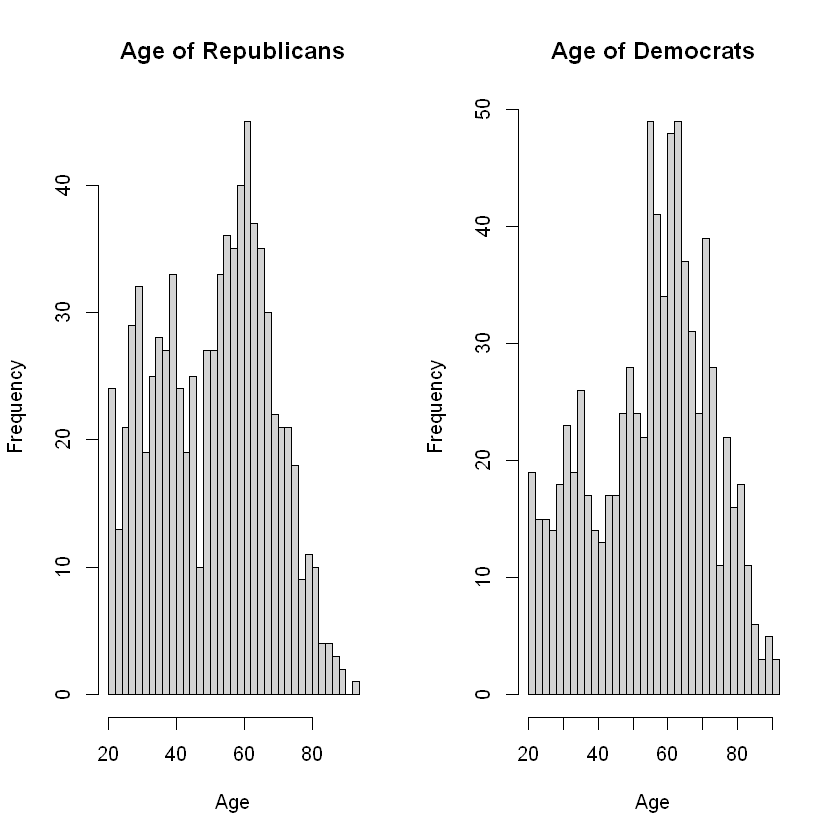

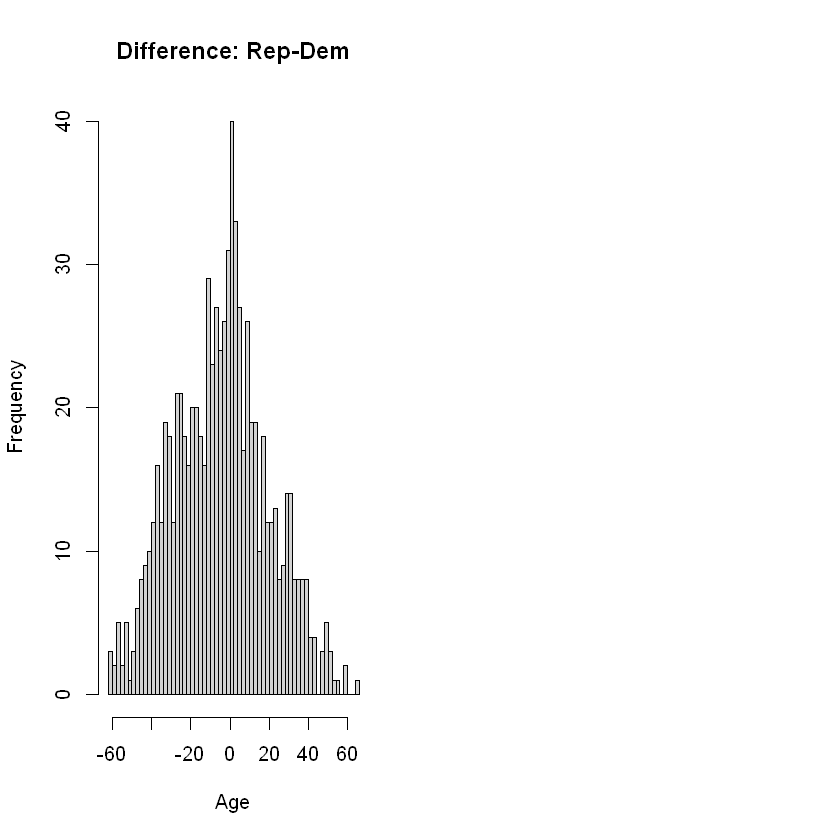

In [161]:
# Normalized affiliations
rep_normalized = sample(rep,size=800)
dem_normalized =sample(dem,size=800)
paste("Number of observations for normalized rep:",length(rep_normalized))
paste("Number of observations for normalized dem:",length(dem_normalized))

paste("rep summary")
summary(rep_normalized)
paste("dem summary")
summary(dem_normalized)

# Historgrams
par(mfrow=c(1,2))
hist(rep_normalized, breaks = 50, main = "Age of Republicans", xlab = "Age")
hist(dem_normalized, breaks = 50, main = "Age of Democrats", xlab = "Age")

diffrepdem = rep_normalized-dem_normalized
hist(diffrepdem,breaks = 50, main = "Difference: Rep-Dem", xlab = "Age")

The means for both $dem$(51.44) and $rep$(55.23) are less their medians (54 and 57 respectively), which indicates a degree of negative skew.

The histrograms for both reponses confirm that the distributions are not normal. Although, according to CLT, the number of observations (800) is large enough to assume a support a normal distribution description.

### Hypothesis test

It is intended to to conduct an independent sample t-test upon the operationalized variables.

$H_0$: There are no differences in mean age between Republicans and Democrats ages. Difference in their mean = 0.

$H_a$: There is a difference in mean between Republicans and Democrats ages. Difference in their mean != 0. 

There is an anticipation of a difference in the means however the direction of which has not been established. Therefore a two-tailed Paired t-test on the sample mean difference between Democrats and Republicans will be undertaken.

A t-test should be conducted as we do not know the population standard deviation. We are planning to conduct a Indpendent Sample t-test.

Assumptions:

- Observations are proposed to be independent of one another. We are assuming each subject is choosing their party id from a scale and each subject has their own birth year.

- Both variables are measured on a continuous scale; "age" is continuous as it does not have start and stoping range. The $birthyr$ can be any year.

- Both variables are considered to be approximately normally distributed. According to Central Limit Theorem our number of observations (800) for each party affilation are large enough to assume that the samples are approximately normally distributed. As visualized in the histogram "Difference: Rep-Dem" above, we can confirm that the sample difference is approximately normally distributed.

- Variables are restricted from containing outliers. As demonstrated in the histograms "Age of Republicans" and "Age of Democrats" above, we can confirm that there are no outliers or rare values that appear far away from the marjority of the data.

- Homogeneity of variance is maintained by selecting 800 observations from Republicans and 800 observations from Democrats to satisfy this approach.

- One independent, categorical variable that has two levels/groups. We are investigating the difference in age between two groups Republicans and Democrats.


Undertaking a independent sample t-test and recording the t-statistic and the degree of freedom (df), for use in the effect size calculation.

In [162]:
# Conducting independent sample t-test with normalized samples (rep & dem)
t_stat_val <- t.test(rep_normalized,dem_normalized)$statistic
df_val <- t.test(rep_normalized,dem_normalized)$parameter
t.test(rep_normalized,dem_normalized)

# Confirming the means from the t-test
paste("Confirm means from t-test")
paste(format((sum(rep)/length(rep)), digits = 4))
paste(format((sum(dem)/length(dem)), digits = 4))


	Welch Two Sample t-test

data:  rep_normalized and dem_normalized
t = -4.9, df = 1598, p-value = 1e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.7641 -2.4709
sample estimates:
mean of x mean of y 
   51.386    55.504 


[1] "Confirm means from t-test"

[1] "51.64"

[1] "55.33"

Calculating Pratical Significance: "Effect Size Correlation (r)" 
$r=\frac{t}{\sqrt{t^2+df}}$    
We use the stored t-statistic and degree of freedom calculated previously.

In [163]:
r=t_stat_val/sqrt((-t_stat_val^2)+df_val)
paste("Effect Size Correlation (r) = ", round(r, digits = 3))

[1] "Effect Size Correlation (r) =  -0.124"

Our paired t-test results show the p-value (1e-06) is less than 0.05, which means this test is highly statistically significant.

Assuming our $H_0$ is true, it shows less than 5% chance of obtaining results like the ones that were observed if the null hypothesis were true. Therefore, we can reject our $H_0$ and support our $H_1$, difference in the means $!=0$. 

Due to "Effect Size Correlation (r)" from -0.1 to -0.3 being a small, we can conclude that our test with 'Effect Size Correlation (r) =  -0.124' shows a small level practical significance.

As displayed by our sample means, we can also conclude that Republicans are younger than Democrats with statistical significance. Although due to our pratical signficance test showing a small level, our results are not practically significant.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

**[1]**  For the first part of the question we need to operationalize the measure labelled '**pid7x**' in the data set, which is the party identification summary.  Respondents were asked to identify using a (1-7) Likert ordinal scale whether they were (1) strongly democratic to (7) strong Republican, independent(3,4,5) or some shade in between. There are three independent categories in the Likert scale, namely (3) Independent, closer to Democrat (4) Independent and (5) Independent, closer to Republican.  All three categories declare themselves as independent, so it arguable that this measure can be operationalised as the one to identify independent voters in the dataset.  One could argue for category (4) alone, however all three categories have the proviso of independent as the initial statement, if shifted a little by the latter 'closer to' clarification.  Those three groups would arguably contain an operationalised variable for a sizeable "independent voter" sub-grouping from the entire data set of respondents.  It is their data we will pull to provide answers to the latter part of the main question.  Arguably this measure could have been improved by simply asking a dichotomous question.    
Question: "Are you an independent voter, or do you have a party allegiance".    
Answer: [1] I am an independent voter I have no party allegiance. [2] I have a party allegiance.    

This would have produced a 'cleaner' demarcation of which voters were truly independent or not.    
In terms of gaps in the data only 98 responders to the data did not answer this question out of 2,500 respondents.    

**[2]**  There is no direct measure in the database that specifically asks "do you believe that the federal investigations of the Russian election interference are baseless".  There are only three questions in the database that even mention Russia.  So we will have to try an operationalize measures which infer a relationship.  In the database these would be responses:    

'**russia16**': "Do you think the Russian government probably interfered in the 2016 presidential election to try to help Donald Trump win, or do you think this probably did not happen?"
Possible answers were:
    _ Russia probably interfered [1]
    _ This probably did not happen [2]    

'**mullerinv**': "Do you approve, disapprove, or neither approve nor disapprove of Robert Mueller's investigation of Russian interference in the 2016 election?
Possible answers were:
    _ Approve extremely strongly  [1]
    _ Approve moderately strongly  [2]
    _ Approve slightly  [3]
    _ Neither approve nor disapprove [4]
    _ Disapprove slightly [5]
    _ Disapprove moderately strongly [6]
    _ Disapprove extremely strongly [7]    

'**coord16**': "Do you think that Donald Trump's 2016 campaign probably coordinatated with the Russians. or do you think this campaign probably did not do this?"
Possible answers were:
    _ Probably coordinated with the Russians [1]
    _ Probably did not [2]    

If a respondent answered negatively to any of these three questions then they are stating that they do not believe there was Russian interference in the presidential campaign.  The leap made here is to propose that the group who believe there was no interference are not likely to agree with the need for an investigation into something that believe did not take place.  We can surmise that there will be a percentage of the partisan populations, declared Republicans or Democrats, who will answer not based upon the facts but will state a view based upon their party-political bias.  If an investigation has the potential to damage their party they'll vote against enquiries,regardless of the facts, in some cases.  However we will be drawing down answers ONLY from the independent sub-group of voters so we should get a a fair representation of how independent voters view of whether the allegations of Russian interference were baseless or not.    

We should get a strong correlation between the negative responses for 'Russia16', 'mullerinv' and 'coord16' for the independent respondents.

### EDA

So we need to create a sub-set of the data containing the:     
**caseid** - the respondents unique id.    
**pid7x** - (1-7) party demarcation, a Likert scale.  
**russia16** - (1,2), a binary variable, Did Russians interfere?    
**muellerinv** - (1-7), a Likert scale approve/disapprove of Mueller investigation?    
**coord16** - (1,2), a binary variable, Trump campaign work with Russians?    

In [164]:
cat("Muller inquiry Approval-1 to Dissapproval-7.")
table(data$muellerinv)
cat("Russian interference, 1-Yes, 2-No.")
table(data$russia16)
cat("Trump campaign coordinated with Russia, 1-Yes, 2-No.")
table(data$coord16)
cat("Democrat-1 to Republican scale-7, independents 3-5.")
table(data$pid7x)
# Recall that any minus-seven value, -7, is a person who DID NOT answer this question

Muller inquiry Approval-1 to Dissapproval-7.


 -7   1   2   3   4   5   6   7 
  1 772 225 151 617  95 144 495 

Russian interference, 1-Yes, 2-No.


  -7    1    2 
   3 1425 1072 

Trump campaign coordinated with Russia, 1-Yes, 2-No.


  -7    1    2 
   1 1315 1184 

Democrat-1 to Republican scale-7, independents 3-5.


 -7   1   2   3   4   5   6   7 
 98 581 276 279 417 241 200 408 

At this point it is useful to inspect the general statistics of the Mueller distribution and the histogram of such.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00    1.00    4.00    3.58    6.00    7.00 

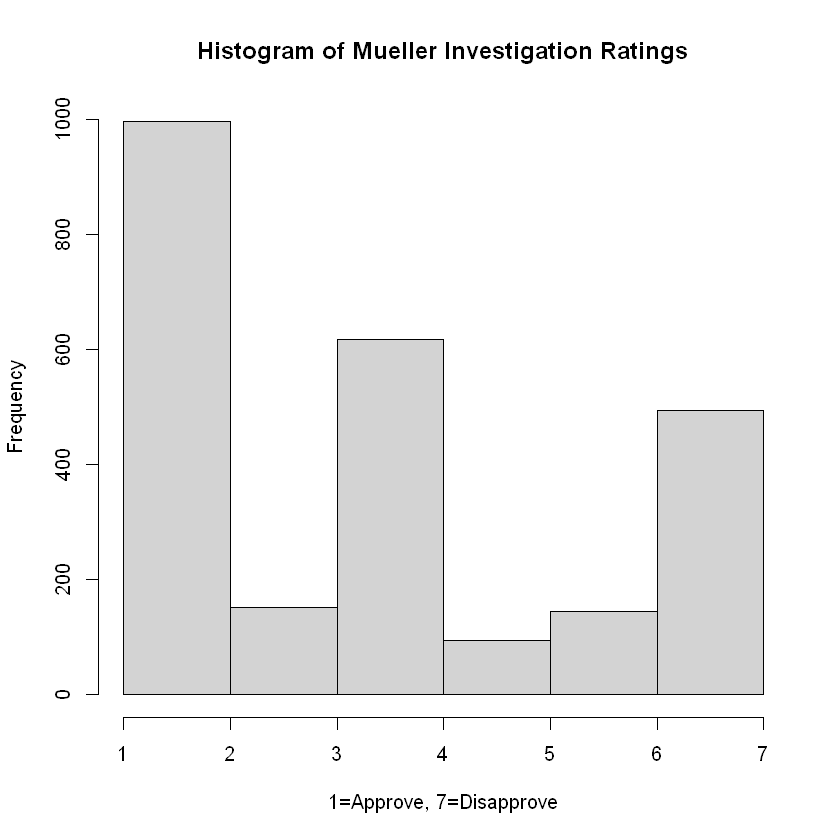

In [165]:
summary(data$muellerinv)
muell_hist = subset(data, muellerinv %in% 1:7)
hist(muell_hist$muellerinv,breaks=7,main= "Histogram of Mueller Investigation Ratings",xlab="1=Approve, 7=Disapprove")

The histogram tells the story that the most popular response was to approve of the Mueller investigation.    
The histogram is left-weighted because of this.    
The large central 'spike' would lead us to believe that many respondents were undecided or unclear on this issue.    
The mean is slightly below the median value of the distribution of responses.    
The distribution does not look normal.    
**Nota Bene** :  We had already shown the Democrat / Republican distributions in hist/table form in Question 2.    


Now we perform data manipulation to get the data in the format and structures that we want.
We remove any NA/NAN/NULLs from the data set before further processing.
We output the initial total number of respondents AND the total number of acceptable, filtered independent voters that will be used for the ensuing analysis.

In [166]:
# Total number of rows in the data set
total_votehard_rows <- sapply(data[("pid7x")],NROW)
cat("Total number respondents in the data set = ",total_votehard_rows,"\n")

### Creating the df_data sub_group of observational variables needed for further investigation
df_data <- data[,c("caseid","pid7x","russia16","muellerinv","coord16")]

### Removing non-idependent voters
df_indies = subset(df_data, pid7x %in% 3:5)
count_drac <- sapply(df_indies[("pid7x")],NROW)

### Removing all NA, NAN, NULLS and data beyond the acceptable ranges of each variable
df1 <- na.omit(df_indies)                                        # omit any NA or NANS
df2 <- df1[(df1$russia16 ==1 | df1$russia16 ==2 | df1$russia16 =="" ),]   # omit nulls and any values not equal to 1 or 2 removed, dichotomous scale
df3 <- df2[(df2$coord16 ==1 | df2$coord16 ==2 | df2$coord16 ==""),]       # omit nulls and any values not equal to 1 or 2 removed, dichotomous scale
df_final <- df3[(df3$muellerinv >=1 && df3$muellerinv <=7 && df3$muellerinv !=""),] # omit nulls any values outside of Likert scale of 1 to 7 removed.
total_indies <- sapply(df_final[("pid7x")],NROW)
cat("Total number of acceptable, cleaned and filtered independent respondents = ",total_indies,"\n")
cat("Muller inquiry Approval-1 to Dissapproval-7.")
table(df_final$muellerinv)

Total number respondents in the data set =  2500 
Total number of acceptable, cleaned and filtered independent respondents =  936 
Muller inquiry Approval-1 to Dissapproval-7.


  1   2   3   4   5   6   7 
244  79  59 283  43  57 171 

Here it is undertaken to perform some fundamental data wrangling and output some interesting basic statistics for the data sets of interest. The subset of the data is manipulated based upon the ***mullerinv*** variable, with a view to finding those independents who disapproved, those you approved and those who specified no opinion either way.  A value of 2 is assigned to the ***muellerinv*** variable for those respondents who disapproved of the Mueller inquiry. A value of 1 is assigned to the ***muellerinv*** variable for those respondents who approved of the Mueller inquiry. That subset of respondents who had an opinion either way is formed into a new subset called 'df_indies_joint_muell'.

Then calculation and output of some basic statistics concerning our operationalized variables is conducted.

In [167]:
count_neg <- 1
count_pos <- 1
fail_count <- 0
a <- df_final
b <- df_final
for (i in 1:total_indies) {
    if (df_final$muellerinv[i] >=5 && df_final$muellerinv[i] <=7) {
        a$caseid[count_neg] <- df_final$caseid[i]
        a$pid7x[count_neg] <- df_final$pid7x[i]
        a$russia16[count_neg] <- df_final$russia16[i]
        a$muellerinv[count_neg] <- 2                   # change here to input 2, disapproved on inquiry
        a$coord16[count_neg] <- df_final$coord16[i]
        count_neg<-count_neg+1
        } else if (df_final$muellerinv[i] >=1 && df_final$muellerinv[i] <=3) { 
        b$caseid[count_pos] <- df_final$caseid[i]
        b$pid7x[count_pos] <- df_final$pid7x[i]
        b$russia16[count_pos] <- df_final$russia16[i]
        b$muellerinv[count_pos] <- 1                  # change here to input 1 , approved of inquiry
        b$coord16[count_pos] <- df_final$coord16[i]
        count_pos<-count_pos+1
        } else if (df_final$muellerinv[i] ==4) {      # undecided
        fail_count <- fail_count+1
        }
}
df_indies_neg <- a[-c(count_neg:total_votehard_rows),]
df_indies_pos <- b[-c(count_pos:total_votehard_rows),]
df_indies_joint_muell <- rbind(df_indies_neg,df_indies_pos)
cat("Total independent respondents who did not favour mueller inquiry = ",count_neg-1,"\n")
cat("Total independent respondents who did favour mueller inquiry = ",count_pos-1,"\n")
cat("Total independent respondents who did not express an opinion on the mueller inquiry = ",fail_count,"\n\n")
count_pc_neg = 100.0*((count_neg-1)/total_indies)
cat("Percentage independents who did not approve of a Mueller inquiry = ",format(count_pc_neg, digits = 4),"%","\n")
count_pc_pos = 100.0*((count_pos-1)/total_indies)
cat("Percentage independents who did approve of a Mueller inquiry = ",format(count_pc_pos, digits = 4),"%","\n")
count_pc_und = 100.0*(fail_count/total_indies)
cat("Percentage independents who expressed no opinion on the Mueller inquiry = ",format(count_pc_und, digits = 4),"%","\n\n")
###
count_neg_russ <- 1
count_pos_russ <- 1
for (i in 1:total_indies) {
    if ( df_final$russia16[i] == 2 ) {
        count_neg_russ <- count_neg_russ+1  # Russia did not interfere
        } else {
        count_pos_russ <- count_pos_russ+1  # Russian did interfere
        }
}
cat("Total independent respondents who did not think there was Russian interference = ",count_neg_russ-1,"\n")
cat("Total independent respondents who did think there was Russian interference = ",count_pos_russ-1,"\n")
count_pc_russ = 100.0*((count_pos_russ-1)/total_indies)
cat("Percentage of independents who did think Russians interfered = ",format(count_pc_russ, digits = 4),"%","\n\n")
###
count_neg_coord <- 1
count_pos_coord <- 1
for (i in 1:total_indies) {
    if ( df_final$coord16[i] == 2 ) {
        count_neg_coord <- count_neg_coord+1  # Trump campaign did not coordinate with Russia
        } else {
        count_pos_coord <- count_pos_coord+1  # Trump campaign did coordinate with Russia
        }
}
cat("Total independent respondents who who did not think Trump campaign coordinated with Russia = ",count_neg_coord-1,"\n")
cat("Total independent respondents who who did think Trump campaign coordinated with Russia = ",count_pos_coord-1,"\n")
count_pc_coord = 100.0*((count_neg_coord-1)/total_indies)
cat("Percentage of independents who did not think Trump campaign coordinated with Russia = ",format(count_pc_coord, digits = 4),"%","\n")

Total independent respondents who did not favour mueller inquiry =  271 
Total independent respondents who did favour mueller inquiry =  382 
Total independent respondents who did not express an opinion on the mueller inquiry =  283 

Percentage independents who did not approve of a Mueller inquiry =  28.95 % 
Percentage independents who did approve of a Mueller inquiry =  40.81 % 
Percentage independents who expressed no opinion on the Mueller inquiry =  30.24 % 

Total independent respondents who did not think there was Russian interference =  437 
Total independent respondents who did think there was Russian interference =  499 
Percentage of independents who did think Russians interfered =  53.31 % 

Total independent respondents who who did not think Trump campaign coordinated with Russia =  478 
Total independent respondents who who did think Trump campaign coordinated with Russia =  458 
Percentage of independents who did not think Trump campaign coordinated with Russia =  51.07

### Hypothesis test

The measure we will choose will be the **muellerinv** data for independent voters only.  The filtered and cleaned data of this sub-set will be used.  The one-sample binomial test is selected.  The one-sample binomial can inform us if the percentage in the population will be significantly different from a 50% threshold.  It is recommended to also give an estimate of the so-called effect of size measure, to interpret the practical significance of the statistics derived.  This is performed also.

$H_0$ : The Null hypothesis, there is no difference in the observed binomial probability of success and a ***p=0.5*** value.

$H_a$ : The alternate hypothesis, there is a difference in the observed binomial probability of success and a ***p=0.5*** value.

### Assumptions
The items of the ***muellerinv*** have been made dichotomous and nominal.    
The sample size used is 936 is significantly less than the electorate size of the United States of America.    
That being said the sample size is considered a fair representation of the population.    
The responses of one respondent are considered independent from other respondents, so one item response by each individial respondent has no bearing on the probability of another.    
The probability of any response is the same for all respondents.    

In [168]:
#
# Binomial test calculation for a dichotomous Muellerinv variable.
#
p_observed <- binom.test((count_pos-1),total_indies,p = 0.5,
                        alternative = c("two.sided", "less", "greater"),
                        conf.level = 0.95)$estimate  # ratio of approvals from independent voters for the Mueller invesitgation
binom.test((count_pos-1),total_indies,p = 0.5,
                        alternative = c("two.sided", "less", "greater"),
                        conf.level = 0.95)  # ratio of approvals of independent voters for the Mueller invesitgation


	Exact binomial test

data:  (count_pos - 1) and total_indies
number of successes = 382, number of trials = 936, p-value = 2.1e-08
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.37643 0.44039
sample estimates:
probability of success 
               0.40812 


Now carry out a 'Cohen's g' size estimate.  This will help establish a measure of the practical significance of the data.    
This metric refers to the magnitude of the difference to a given threshold, in this instance ***p=0.5***.    
The difference between the observed and threshold value can then be interpreted.    
A general tabular intepretation practical significance of the 'Cohen's g' statistic is provided, using an absolute scale.    

Cohen’s g    Interpretation    
0.00 < 0.05  Negligible    
0.10 < 0.15  Small    
0.20 < 0.25  Medium    
0.25 or more Large    

In [169]:
Cohens_g <- abs(p_observed - 0.50)  # taking the absolute so it can be compared to the table
format (Cohens_g, digits = 2)

probability of success 
               "0.092"

So given the above calculations we undertake the following discussion:        
**[1]** Upon measurement there is a slight majority (53.3%) of independent respondents who thought Russia DID interfere in the US election campaign.        
**[2]** Upon measurement there is a very slim majority (51.1%) of independents who think the Trump campaign DID NOT coordinate with Russia.       
**[3]** A significant minority of independents (40.8%) did approve of the Mueller inquiry.  28.9% expressed preference against the Mueller investigation, however a major portion of the independents had no opinion either way (30.2%).         

Given that results [1] and [2] above are so slight and the sample groups so relatively small compared to the population, it is arguable that they are within the limits of statistical error and thus do not make a sound basis for providing even an indicative, never mind definitive, answer either way to the main question.    

In terms of statistical signficance the Binomial testing provides a 40.8% chance of success.
$H_0$ is our null hypothesis that the independent voters approve or disapprove in equal proportion p=0.5.
$H_a$ is the alternative hypothesis is that the independent voters express a preference either way, approve/disapprove.
The resulting value was 0.41 (rounded) which is not equal to 0.5.  Therefore the alternative hypothesis holds.
The voters therefore approve or disapprove.  Since this 0.41<0.5 then voters are less likely to approve.    

Concluding: Independent voters were split on whether or not Russia interferred or indeed the Trump campaign coordinated with Russia during the campaign.  A significant minority of independent voters favoured the Mueller inquiry taking place.  If we can fairly operationalise that variable as the measure of basis of the investigation, I think there are insufficient grounds to confirm the hypothesis in the main question.    

"Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?"    
Unproven.  A significant minority of independent respondents, the major grouping with 41%, felt that an inquiry was valid. It should therefore be concluded that this hypotheses is not successful.

Given the result of the 'Cohen's g' the outcome is said to have negligible to small practical significance.

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

***Defining the variables***

We will define two random variables:

* X_angry = number of voters that voted and are angry at the the way things are going in the country these days.
    Question: How do you feel about the way things are going in the country: Angry?
* X_fear = number of voters that voted and are afraid of the the way things are going in the country these days
    Question: How do you feel about the way things are going in the country: Afraid?
    
The turnout18 question indentifies which respondents actually used their electoral franchise in the election.  The subset of respondents to that question who actually "Definitely voted in person" and "Definitely voted by mail" categories ONLY will be used in the following analysis in the appraisal based upon the the geangry and geafraid questions.  This data will be used to populate the X_angry and X_fear sub-datasets.

From the ANES questionaire, we can also see that X_angry and X_fear will have an ordinal data structure.  The level of anger and fear are ranked using an ordinal Likert scale, where 1 is the least intensive feeling and 5 is the most intensive feeling.

***Identifying the gaps***

The first gap in defining the two random variables is that fear is not explicity written as a question in the Global Emotion Battery questions.  Thus we are assuming the word "afraid" is synonymous which "fear" and the data for geafraid is used to represent observations in X_fear.  So we operationalise that measured variable.

A second gap is that that "anger" and "fear" are patently a spectrum of emotions and it is difficult to define if these feelings are independent or dependent upon one another.  Since life is subjective it is also difficult to compare deep anger in one person to deep anger in another.  The depth of emotion may not be be the same, nor may it exhibit in the same way.  People can be both angry and fearful at the same time and people can also angry OR afraid as separate emotions.  To be conservative, we will assume that the two random variables X_angry and X_fear are dependent in this analysis.

### EDA
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

***Subset the data***

First we will take a look at the results for turnout18, where we can extract information on who voted.

In [170]:
n = nrow(data)
n
table(data$turnout18)

[1] 2500


  1   2   3   4   5 
968 357 517 544 114 

From the ANES 2018 Pilot Study Questionaire Specifications file, there are three options that represent people who voted:

* 1 = definitely voted in person on Nov 6
* 2 = definitely voted in person before Nov 6
* 3 = definitely voted by mail

We will include respondents who answered 1, 2 or 3 as those who voted and include them in the following X_angry and X_fear analysis.  While people who filled out 4, 5, or blank, -7, will be excluded. People who filled out options 4 and 5 are left out because there is incertainty whether they voted or not.  Blanks, -7, are not included because we do not know if those people voted or not.

In [171]:
# Use the subset function to only get values between 0 and 3 from turnout18
# At the same time, grab the columns geangry and gefraid which represents voters who answer they were angry or afraid 
# at the country's current situation
# Take a sneak peak of the extracted data using the table function
voted_data = subset(data, turnout18 %in% 0:3, select = c("geangry", "geafraid"))
table(voted_data$geangry)
table(voted_data$geafraid)


 -7   1   2   3   4   5 
  2 342 346 393 379 380 


 -7   1   2   3   4   5 
  4 418 423 433 343 221 

In [172]:
# We notice again there are negative values which represent blanks.  Again we will remove the negative values which do not add to answering this question.  Then, let's visualize the sample distributions for X_angry and X_fear.
# Remove the negative values from geangry and geafraid using the subset function
# Unlist helps remove the nested list
X_angry = unlist(subset(voted_data, geangry > 0, geangry))
X_fear = unlist(subset(voted_data, geafraid > 0, geafraid))

***Visualize the data***

With the hist function, visualize the dataset.

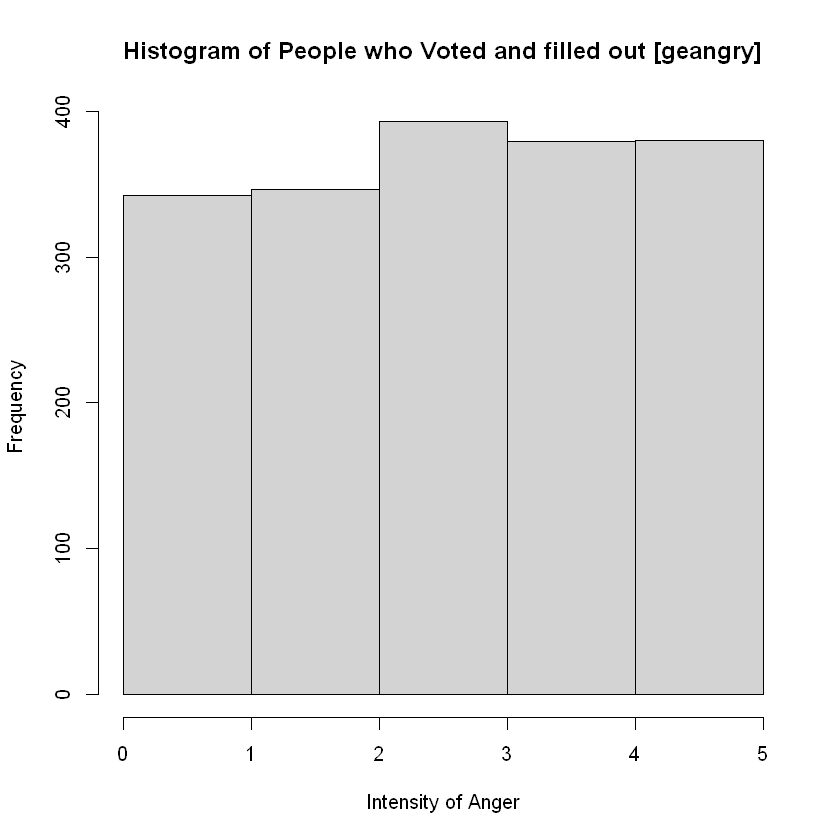

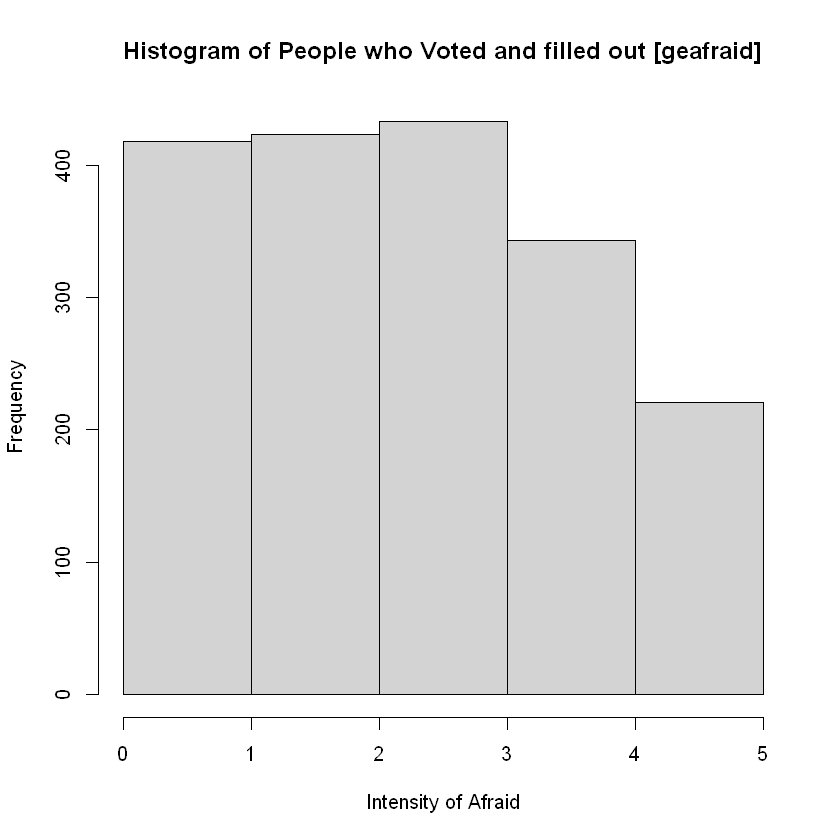

In [173]:
hist(X_angry,
     main="Histogram of People who Voted and filled out [geangry]", 
     xlab="Intensity of Anger", 
     breaks=c(0,1,2,3,4,5))
hist(X_fear,
     main="Histogram of People who Voted and filled out [geafraid]", 
     xlab="Intensity of Afraid", 
     breaks=c(0,1,2,3,4,5))

The histogram of X_angry is slightly right-weighted and the histogram for X_fear is slightly left-weighted.
The histograms suggests that more voters also filled out higher levels of angry (mean greater than 3) than higher levels of fear (mean less than 3).  We can verify the means using the summary function.

In [174]:
summary(X_angry)
summary(X_fear)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    3.06    4.00    5.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    2.74    4.00    5.00 

### Hypothesis test

Given the data is ordinal and the fact that emotions can be inter-related (dependent) , the most appropriate test is the Sign test.  The Sign test assumes that each pair of (X_angry, X_fear) is independent and from the same distribution.  
The assumption of same distribution is met for these random variables because the pairs of (X_angry, X_fear) are from
the same defined sample population of people who voted.  It is assumed however that pairs of (X_angry, X_fear) are
mostly independent given the large sample size but we are also aware of possible bias in the surveys in which the respondent is rewarded for participating in.

***Sign Test***

To perform the sign test, we will create a new random variable $\textrm{Sign = X_angry - X_afraid}$    

$H_0$: The Null hypothesis, $P(Sign > 0) = P(Sign) < 0)$, suggesting that the people who voted had similar feelings of angry and fear.    

$H_a$: The alternate hypothesis, $P(Sign > 0) \ne P(Sign < 0)$, suggesting that more of the voters filled out stronger feelings of angry or fear about the current state of the country.    
 
The critical value will be $\alpha = 0.05$, that we can reject the null hypothesis if there is less than a 5% chance of this observation given the null hypothesis is true.    

In [175]:
# First create a new column in the data frame for the new random variable Sign
voted_data$Sign = voted_data$geangry - voted_data$geafraid
head(voted_data, 5)

# The Sign test excludes Sign = 0.  Thus we only count the total number of positive or negative values.

# Use the count function to get the total number of positive values and non-zero values
# We can see there are more positve values than negative values
plus_values = count(voted_data, Sign > 0)[2,2]
non_zero_values = count(voted_data, Sign != 0)[2,2]
c(plus_values, non_zero_values)

,geangry,geafraid,Sign
,<int>,<int>,<int>
1,2,2,0
5,2,3,-1
6,3,3,0
7,1,4,-3
8,1,3,-2


[1]  678 1026

Since the Sign test is binomial (only two outcomes: positive or negative), we will compare the random variable Sign to the
binomial distribution.  Therefore the null hypothesis represents the case where the binomial parameter $p = 0.5$,
because the probability of positve Sign and negative Sign are equal.  The alternatve hypothesis would be that the
binomial parameter $p \ne 0.5$.

In [176]:
# Use the binom.test function to compare Sign to the binomial distribution
prob_plus = binom.test(as.numeric(plus_values), as.numeric(non_zero_values)) 
prob_plus


	Exact binomial test

data:  as.numeric(plus_values) and as.numeric(non_zero_values)
number of successes = 678, number of trials = 1026, p-value <2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.63093 0.68978
sample estimates:
probability of success 
               0.66082 


Given that the p-value (< 2.2e-16) is << $\alpha = 0.05$, we reject the null hypothesis in favor of the alternate hypothesis 
- the number of people who voted did not fill out the same intensities for angry and fear.  

Lastly the effect size (probabiilty of success) is 66%.  
Since Sign was defined as $\textrm{Sign = X_angry - X_afraid}$, the 66% of positive values means that more than half 
the voters filled out higher intensities for anger than afraid.  Thus, the Sign Test and the effect size suggest that anger was more effective in driving voter turnout from 2016 to 2018.

## Question 5: Are Americans who are empathetic towards racial and ethnic groups more likely to care about climate change?

#### Question 5: Are Americans who are empathetic towards racial and ethnic groups more likely to care about climate change?

**Defining the variables**

We will define two random variables:

* X_empathetic = represent the degree of empathy towards others
* X_climate = represent the degree of concern for climate change

Observations for X_empathetic variable were gathered from the [emp_persp] question: "How often would you say you try to better understand people of other racial or ethnic groups by imagining how things look from their perspective?"  Observations for X_climate are gathered from [warmyou] question: "How important is the issue of climate change to you personally?"

From the ANES questionaire, we can also see that X_empathetic and X_climate will have an ordinal data structure.  In X_empathetic, the degree of concern decreases from 1 to 5.  Whereas in X_climate, the degree of concern increases from 1 to 5.  To standardize the intensities, the measures in X_empathetic will be reversed such that the intensity of empathy increases from 1 to 5.

**Identifying Gaps**

One gap is that people may think they are more empathetic than they are in reality.  The result is that we may see empathy measures skewed negative, with more measures concentrated at the higher intensities.

### EDA

##### EDA

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed. Use visual tools to assess the relationship among your variables and comment on any features you find.

First we will subset the data to [emp_persp] and [warmyou]

***Creating the subset the data***

In [177]:
# Take a look at the [emp_persp] and [warmyou] dataset using the table and summary function
# Check the total number of rows is still 2500 with sum function
table(data$emp_persp)
summary(data$emp_persp)
sum(table(data$emp_persp))
#
table(data$warmyou)
summary(data$warmyou)
sum(table(data$warmyou))


 -7   1   2   3   4   5 
  1 451 705 838 316 189 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00    2.00    3.00    2.63    3.00    5.00 

[1] 2500


  1   2   3   4   5 
495 369 533 492 611 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    3.14    4.00    5.00 

[1] 2500

There is one -7 value in the [emp_persp] dataset that we will have to take of.

In [178]:
# Assigns the observations to the random variables
# Use the subset function to remove negative values from [emp_persp]
#
X_empathy = data.frame(subset(data, select="emp_persp"))
X_climate = data$warmyou

Since [emp_persp] contains one negative -7 value, we will replace it with the median of the dataset.  We choose to replace with the median because it will minimize skewing the dataset.  From earlier, we used the summary function to determine the median was 3.

Additionally, recall the order of intensity is different for [emp_persp] and [warmyou].  We will reverse the measures such that the intensity of concern increases for the [emp_persp] dataset.

The following code iterates through the dataset reversing the data so that the likert scales match appropriately.
The non-answer (-7) issue is also dealt with.

In [179]:
X_empathy$new_order = 3
#
for (i in c(1:nrow(X_empathy))) {
  if (X_empathy$emp_persp[i] == 1) {
    X_empathy$new_order[i] = 5
  } else if (X_empathy$emp_persp[i]  == 2) {
    X_empathy$new_order[i] = 4
  } else if (X_empathy$emp_persp[i] == 4) {
    X_empathy$new_order[i] = 2
  } else if (X_empathy$emp_persp[i] == 5) {
    X_empathy$new_order[i]= 1
  } else if (X_empathy$emp_persp[i] == -7) {
    X_empathy$new_order[i]= 3
  } 
}

We can verify the transformation using the table function.  The -7 value was added to column 3 and the total rows are still 2500.

In [180]:
table(X_empathy$emp_persp)
sum(table(X_empathy$emp_persp))
table(X_empathy$new_order)
sum(table(X_empathy$new_order))


 -7   1   2   3   4   5 
  1 451 705 838 316 189 

[1] 2500


  1   2   3   4   5 
189 316 839 705 451 

[1] 2500

We can then visualize the data set with histograms.

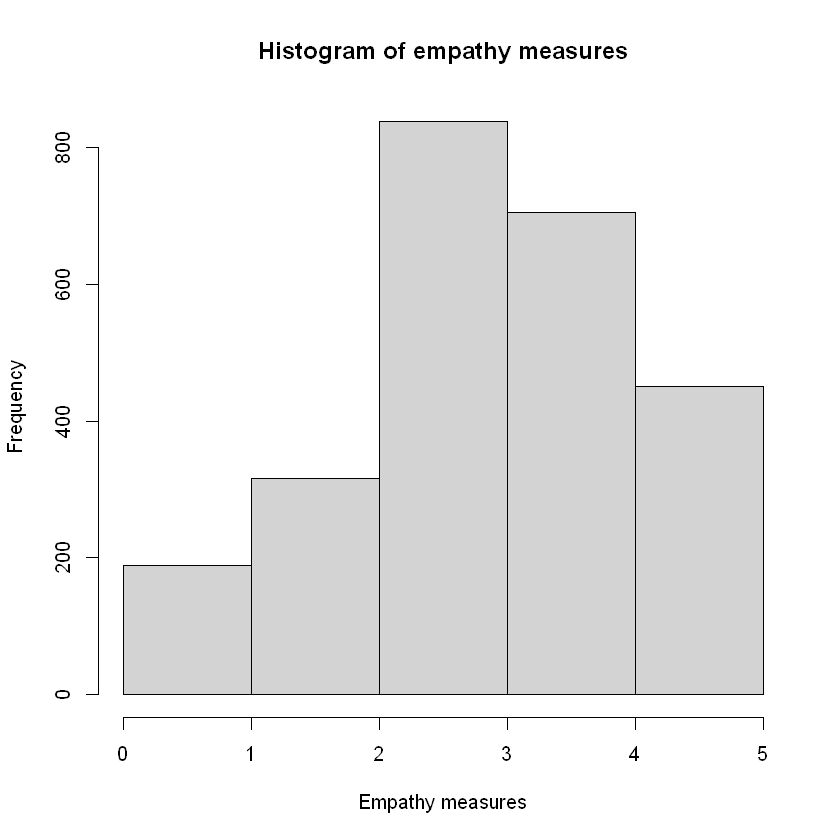

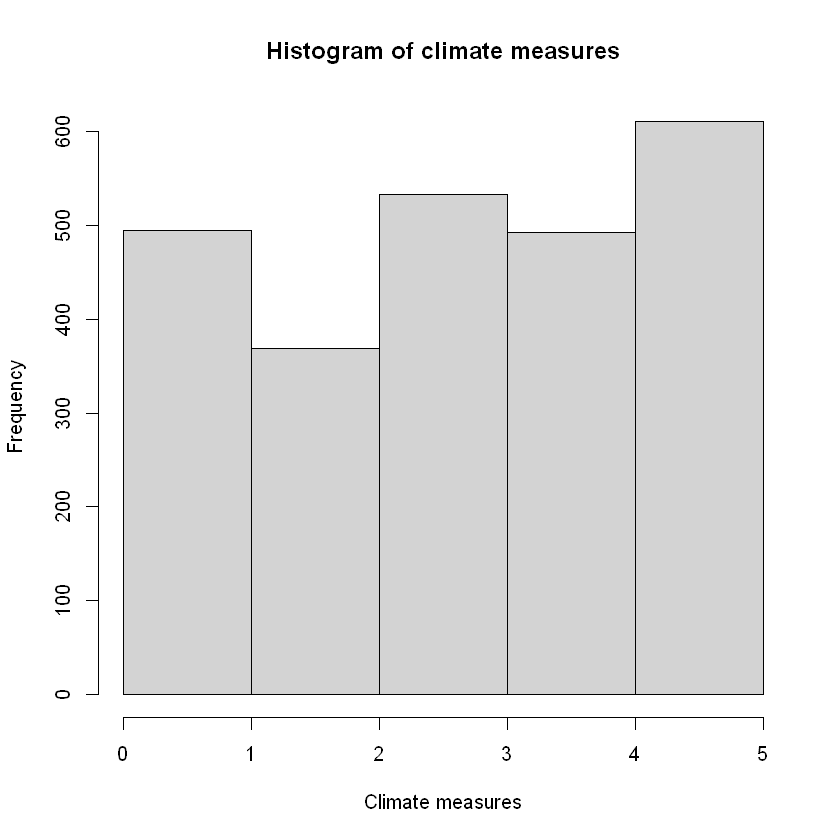

In [181]:
# Use the hist function to see the distributions of X_empathy and X_climate
hist(X_empathy$new_order,
     breaks = c(0,1,2,3,4,5), main="Histogram of empathy measures", xlab="Empathy measures")
hist(X_climate,
     breaks = c(0,1,2,3,4,5), main="Histogram of climate measures", xlab="Climate measures")

The distributions for the X_empathy and X_climate look different.  X_empathy is weighted to the right, whereas X_climate distribution looks more uniform.  One reason that X_empathy is right-weighting was mentioned in part 1 - people may exaggerate their empathy.

####  Hypothesis Test

The Sign Test is chosen for this hypothesis test.  The Sign Test is appropriate because:

1. The observations for X_empathy and X_climate are dependent because the same person filled out answers for both [emp_persp] and [warmyou].
2. The dataset is ordinal and a mean does not make sense.  The answers for [emp_persp] and [warmyou] are ranked values ranging from 1 to 5.

***Sign Test***    

To perform the sign test, we will create a new random variable $\textrm{Sign = X_empathy - X_climate}$    

$H_0$: Null hypothesis, $P(Sign > 0) = P(Sign) < 0)$, suggesting that people who are empathetic are similarly concerned about climate change.    

$H_a$: The alternate hypothesis $P(Sign > 0) \ne P(Sign < 0)$, suggesting that people who are empathetic are not necessarily concerned with climate change.    

The critical value will be $\alpha = 0.05$; we can reject the null hypothesis if there is less than a 5% chance of this observation given the null hypothesis is true.    

In [182]:
# First create a new column in the data frame for the new random variable Sign
df_empathy_climate = data.frame("X_empathy"= X_empathy$new_order, 
                                "X_climate"= X_climate, 
                                "Sign"= (X_empathy$new_order-X_climate))

The Sign test excludes Sign = 0.  Thus we only count the total number of positive or negative values.

In [183]:
# Use the count function to get the total number of positive values and non-zero values
# We can see there are more positve values than negative values
plus_values = count(df_empathy_climate, Sign > 0)[2,2]
non_zero_values = count(df_empathy_climate, Sign != 0)[2,2]
c(plus_values, non_zero_values)

[1]  975 1691

Since the Sign test is binomial (only two outcomes: positive or negative), we will compare the random variable Sign to the binomial distribution.  Therefore the null hypothesis represents the case where the binomial parameter $p = 0.5$, because the probability of positve Sign and negative Sign are equal.  The alternatve hypothesis would be that the binomial parameter $p \ne 0.5$.

In [184]:
# Use the binom.test function to compare Sign to the binomial distribution
prob_plus = binom.test(as.numeric(plus_values), as.numeric(non_zero_values)) 
prob_plus


	Exact binomial test

data:  as.numeric(plus_values) and as.numeric(non_zero_values)
number of successes = 975, number of trials = 1691, p-value = 3.3e-10
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.55262 0.60028
sample estimates:
probability of success 
               0.57658 


### Conclusion

Given that the p-value (3.257e-10) is << $\alpha = 0.05$, we reject the null hypothesis in favor of the alternate hypothesis - people who considered themselves empathetic in the survey are not similarly concerned with climate change.  

Lastly the effect size (probabiilty of success) is 58%.  Since Sign was defined as $\textrm{Sign = X_empathetic - X_climate}$, the 58% of positive values means that slightly more than half the people chose higher intensities in [emp_persp] than [warmyou].  Though the difference is statistically significant, an 8% difference from 50% can be considered small.  Thus due to the low practical significance, we cannot determine if a person that is more empathetic will be more, less, or similary concerned with climate change.
